In [13]:
!pip install osmnx

  Using cached matplotlib-3.4.2-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [14]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [15]:
import geopy as gp
from geopy.geocoders import Nominatim
import networkx as nx
import osmnx as ox
from geopy import Point


In [16]:
    n = "대구광역시 북구 산격동 대학로 80"
    app = Nominatim(user_agent='tutorial')
    location = app.geocode('{n}'.format(n=n))

    print(location.latitude, location.longitude)

    point = location.latitude,location.longitude
    G = ox.graph_from_point(point, network_type='drive', dist=1000)

35.891822 128.610749


In [17]:
G_proj = ox.project_graph(G)


In [18]:
fire_station_list = {
  "삼덕119안전센터" : "대구광역시 중구 삼덕동1가 63",
  "대구중부소방서" : "대구광역시 중구 남산4동 2967-4",
  "대구동부소방서" : "대구광역시 동구 신천동 73",
  "대구중부소방서" : "대구광역시 중구 남산4동 2267-4",
  "대구북부소방서" : "대구광역시 북구 칠성동2가 302-142",
  "대구중부소방서" : "서문로119안전센터 대구광역시 중구 성내2동 경상감영길 45",
  # "대현119안전센터" : "대구광역시 북구 대현1동 155-2",
  "봉덕119안전센터" : "대구광역시 남구 봉덕1동 481-11",
  # "신천119안전센터" : "대구광역시 동구 신천3동 73",
  "수성119안전센터" : "대구광역시 수성구 수성2.3가동 들안로60길 30",
  "대구서부소방서" : "대구광역시 서구 평리6동 70-1",
  "명덕119안전센터" : "대구광역시 남구 대명2동 1822-7",
  "대신119안전센터" : "대구광역시 중구 대신동 115-378",
  # "내당119안전센터" : "대구광역시 서구 내당4동 351-6",
  "무열로119안전센터" : "대구광역시 수성구 만촌동 무열로 139",
  # "북구의용소방대6지역대" : "대구광역시 북구 칠성동1가 81",
  "남산119안전센터" : "대구광역시 중구 남산4동 2967-4",
  "만촌119안전센터" : "대구광역시 수성구 만촌동 달구벌대로 2658",
  "교동119지역대" : "대구광역시 중구 동문동 1-32",
  # "칠성119지역대" : "대구광역시 북구 칠성동1가 656-16",
  # "칠성119안전센터" : "대구광역시 중구 칠성동2가 302-142",
  "본리119안전센터" : "대구광역시 달서구 본리동 154-2",
  # "황금119안전센터" : "대구광역시 수성구 지산1동 동대구로12길 41",
  # "비산119안전센터" : "대구광역시 서구 비산2.3동 57-12",
  # "대명119안전센터" : "대구광역시 남구 대명9동 2680-7",
  "성명119안전센터" : "대구광역시 남구 대명동 대명남로 12-1",
  # "평리119안전센터" : "대구광역시 서구 평리6동 70-1",
  # "이현119안전센터" : "대구광역시 서구 이현동 44-73",
}

fire_station_loc = {}



# n = "대구광역시 북구 산격동 대학로 80"
app = Nominatim(user_agent='tutorial')
for key,val in fire_station_list.items():
  print(key,":",val)
  location = app.geocode('{n}'.format(n=key))
  each_location = (location.latitude,location.longitude)
  fire_station_loc[key] = each_location

print(fire_station_loc)

# location = app.geocode('{n}'.format(n=n))
# print(location.latitude, location.longitude)



삼덕119안전센터 : 대구광역시 중구 삼덕동1가 63
대구중부소방서 : 서문로119안전센터 대구광역시 중구 성내2동 경상감영길 45
대구동부소방서 : 대구광역시 동구 신천동 73
대구북부소방서 : 대구광역시 북구 칠성동2가 302-142
봉덕119안전센터 : 대구광역시 남구 봉덕1동 481-11
수성119안전센터 : 대구광역시 수성구 수성2.3가동 들안로60길 30
대구서부소방서 : 대구광역시 서구 평리6동 70-1
명덕119안전센터 : 대구광역시 남구 대명2동 1822-7
대신119안전센터 : 대구광역시 중구 대신동 115-378
무열로119안전센터 : 대구광역시 수성구 만촌동 무열로 139
남산119안전센터 : 대구광역시 중구 남산4동 2967-4
만촌119안전센터 : 대구광역시 수성구 만촌동 달구벌대로 2658
교동119지역대 : 대구광역시 중구 동문동 1-32
본리119안전센터 : 대구광역시 달서구 본리동 154-2
성명119안전센터 : 대구광역시 남구 대명동 대명남로 12-1
{'삼덕119안전센터': (35.2048721, 129.0333444), '대구중부소방서': (35.86245475, 128.57528365414757), '대구동부소방서': (35.5343407, 129.29218193341958), '대구북부소방서': (35.8780078, 128.59235052933332), '봉덕119안전센터': (35.2048721, 129.0333444), '수성119안전센터': (36.96213935, 127.05910733612849), '대구서부소방서': (35.7299717, 128.4530626143405), '명덕119안전센터': (35.2048721, 129.0333444), '대신119안전센터': (37.5761984, 127.0455765), '무열로119안전센터': (35.922081000000006, 128.6439549748747), '남산119안전센터': (35.2614287, 129.0868803), '만촌119안전센터': (

In [ ]:
def approximate():
  

In [24]:

orig = (35.891822,128.610749) # 경북대학교
dest = fire_station_loc["대구북부소방서"]

location = app.geocode('대구시 북구 관음동')
dest = (location.latitude,location.longitude)
print(location)

print(orig,dest)

# G = ox.graph_from_address(address="Daegu,Korea")
G = ox.graph_from_point(orig, network_type='all', dist=10000,retain_all = True)

approx_orig = ox.distance.nearest_nodes(G,orig[1],orig[0])
approx_dest = ox.distance.nearest_nodes(G,dest[1],orig[0])

# approx_orig = orig
# approx_dest = dest


관음동, 북구, 대구, 41441, 대한민국
(35.891822, 128.610749) (35.93986, 128.54382)


In [25]:
print(approx_orig, approx_dest)

5102781097 421774122


In [32]:
approx_dest_tuple = (G.nodes[approx_dest]['y'],G.nodes[approx_dest]['x'])
print(approx_dest_tuple)

(35.8911681, 128.5431369)


(35.891822, 128.610749)


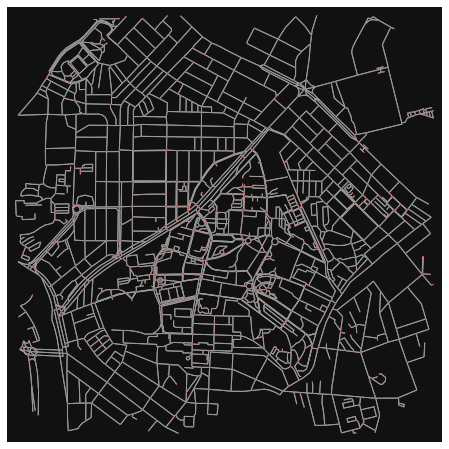

In [62]:

approx_dest_tuple_temp = f"{approx_dest_tuple[0]},{approx_dest_tuple[1]}"
print(orig)


G = ox.graph_from_point(orig, network_type='walk', dist=1000,retain_all = True)
fig, ax = ox.plot_graph(G, node_color='r',node_size=0.5)



# G = ox.graph_from_point(orig, network_type='drive', dist=10000)
# G = ox.graph_from_point(orig, network_type='drive', dist=10000)

# # routes = ox.k_shortest_paths(G, temp, dest, k=30, weight='length')
# routes = ox.k_shortest_paths(G, approx_orig, approx_dest, k=3, weight='length')
# fig1_2, ax = ox.plot_graph_routes(G, list(routes), route_colors='y', route_linewidth=4, node_size=0.5)
# # fig1_2, ax = ox.plot_graph_folium(G, route_colors='y', node_size=0.5)


In [ ]:
routes = [route1, route2, route3]
rc = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)

In [63]:
import geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon

In [77]:
network_type = 'walk'
trip_times = [1, 2, 3, 4, 5] #in minutes
travel_speed = 4.5 #walking speed in km/hour


In [83]:
G = ox.graph_from_point(orig, network_type='walk', dist=100,retain_all = True)


In [84]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

In [85]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)


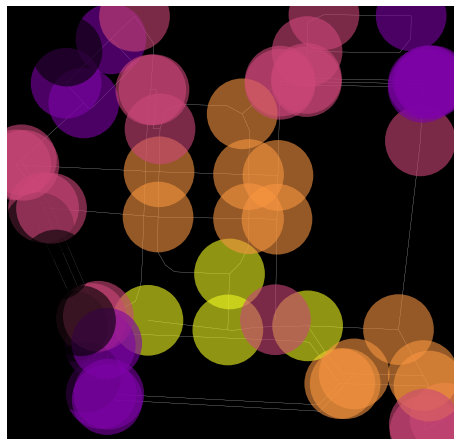

In [92]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_size=5000, node_alpha=0.6, node_zorder=2,
                        bgcolor='k', edge_linewidth=0.2, edge_color='#999999')

In [93]:
# make the isochrone polygons
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

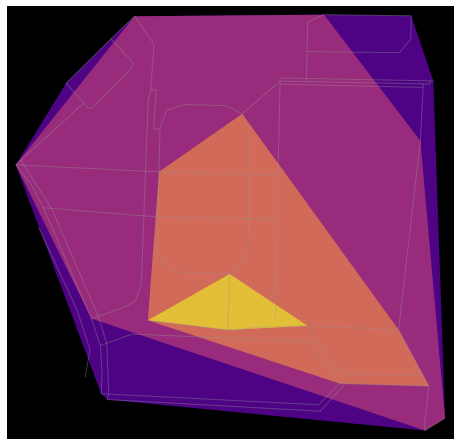

In [94]:
import matplotlib.pyplot as plt

# plot the network then add isochrones as colored descartes polygon patches
fig, ax = ox.plot_graph(G, show=False, close=False, edge_color='#999999', edge_alpha=0.2,
                        node_size=0, bgcolor='k')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

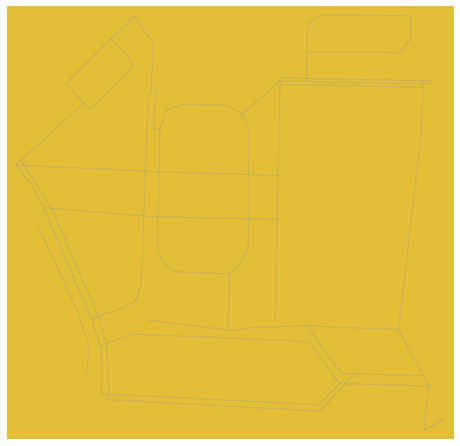

In [95]:
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': subgraph.nodes()}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(G, show=False, close=False, edge_color='#999999', edge_alpha=0.2,
                        node_size=0, bgcolor='k')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()